In [1]:
from google.colab import files
files.upload()


Saving customer_churn.csv to customer_churn.csv


{'customer_churn.csv': b'CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn\r\nC00001,6,64,1540,One year,Credit Card,No,1,0\r\nC00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0\r\nC00003,27,31,1455,Two year,Credit Card,No,1,0\r\nC00004,53,29,7150,Month-to-month,Electronic Check,No,1,0\r\nC00005,16,185,1023,One year,Electronic Check,No,1,0\r\nC00006,55,44,7538,Two year,Electronic Check,No,0,0\r\nC00007,66,99,4178,Two year,Bank Transfer,No,1,0\r\nC00008,61,128,3088,Month-to-month,Bank Transfer,No,1,0\r\nC00009,64,124,7973,Month-to-month,Credit Card,No,1,0\r\nC00010,14,120,5844,One year,Bank Transfer,Yes,1,0\r\nC00011,59,57,5168,One year,Credit Card,Yes,0,0\r\nC00012,7,110,7282,Month-to-month,Electronic Check,No,1,1\r\nC00013,53,86,3438,Month-to-month,Bank Transfer,Yes,1,0\r\nC00014,8,158,6194,Month-to-month,Credit Card,No,1,1\r\nC00015,53,58,768,Month-to-month,Credit Card,Yes,1,0\r\nC00016,65,77,4071,Month-to-month,Credit Ca

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("customer_churn.csv")
df.head()


,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,No,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,Yes,1,0
2,C00003,27,31,1455,Two year,Credit Card,No,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,No,1,0
4,C00005,16,185,1023,One year,Electronic Check,No,1,0


In [3]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        500 non-null    object
 1   Tenure            500 non-null    int64 
 2   MonthlyCharges    500 non-null    int64 
 3   TotalCharges      500 non-null    int64 
 4   Contract          500 non-null    object
 5   PaymentMethod     500 non-null    object
 6   PaperlessBilling  500 non-null    object
 7   SeniorCitizen     500 non-null    int64 
 8   Churn             500 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 35.3+ KB


In [4]:
df['Churn'].value_counts()


,count
Churn,
0,447
1,53


In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = ['PaperlessBilling']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,CustomerID,Tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,PaperlessBilling,SeniorCitizen,Churn
0,C00001,6,64,1540,One year,Credit Card,0,1,0
1,C00002,21,113,1753,Month-to-month,Electronic Check,1,1,0
2,C00003,27,31,1455,Two year,Credit Card,0,1,0
3,C00004,53,29,7150,Month-to-month,Electronic Check,0,1,0
4,C00005,16,185,1023,One year,Electronic Check,0,1,0


In [6]:
df = pd.get_dummies(df, columns=['Contract', 'PaymentMethod'], drop_first=True)
df.head()


,CustomerID,Tenure,MonthlyCharges,TotalCharges,PaperlessBilling,SeniorCitizen,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_Electronic Check
0,C00001,6,64,1540,0,1,0,True,False,True,False
1,C00002,21,113,1753,1,1,0,False,False,False,True
2,C00003,27,31,1455,0,1,0,False,True,True,False
3,C00004,53,29,7150,0,1,0,False,False,False,True
4,C00005,16,185,1023,0,1,0,True,False,False,True


In [7]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
df[['Tenure', 'MonthlyCharges', 'TotalCharges']] = minmax.fit_transform(
    df[['Tenure', 'MonthlyCharges', 'TotalCharges']]
)


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Tenure_std', 'MonthlyCharges_std']] = scaler.fit_transform(
    df[['Tenure', 'MonthlyCharges']]
)

df.head()


,CustomerID,Tenure,MonthlyCharges,TotalCharges,PaperlessBilling,SeniorCitizen,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_Electronic Check,Tenure_std,MonthlyCharges_std
0,C00001,0.071429,0.245810,0.176305,0,1,0,True,False,True,False,-1.478807,-0.959185
1,C00002,0.285714,0.519553,0.203498,1,1,0,False,False,False,True,-0.752287,-0.012290
2,C00003,0.371429,0.061453,0.165454,0,1,0,False,True,True,False,-0.461679,-1.596890
3,C00004,0.742857,0.050279,0.892506,0,1,0,False,False,False,True,0.797622,-1.635539
4,C00005,0.214286,0.921788,0.110303,0,1,0,True,False,False,True,-0.994460,1.379066


In [9]:
Q1 = df['MonthlyCharges'].quantile(0.25)
Q3 = df['MonthlyCharges'].quantile(0.75)
IQR = Q3 - Q1

df = df[(df['MonthlyCharges'] >= Q1 - 1.5*IQR) &
        (df['MonthlyCharges'] <= Q3 + 1.5*IQR)]


In [10]:
# 1. Average monthly spend
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['Tenure'] + 1)

# 2. High value customer
df['HighValueCustomer'] = (df['MonthlyCharges'] > df['MonthlyCharges'].mean()).astype(int)

# 3. Long tenure customer
df['LongTenure'] = (df['Tenure'] > df['Tenure'].median()).astype(int)

# 4. Charges per tenure
df['ChargesPerTenure'] = df['MonthlyCharges'] / (df['Tenure'] + 1)

# 5. Engagement score (simple)
df['EngagementScore'] = df['Tenure'] * df['MonthlyCharges']

df.head()


,CustomerID,Tenure,MonthlyCharges,TotalCharges,PaperlessBilling,SeniorCitizen,Churn,Contract_One year,Contract_Two year,PaymentMethod_Credit Card,PaymentMethod_Electronic Check,Tenure_std,MonthlyCharges_std,AvgMonthlySpend,HighValueCustomer,LongTenure,ChargesPerTenure,EngagementScore
0,C00001,0.071429,0.245810,0.176305,0,1,0,True,False,True,False,-1.478807,-0.959185,0.164552,0,0,0.229423,0.017558
1,C00002,0.285714,0.519553,0.203498,1,1,0,False,False,False,True,-0.752287,-0.012290,0.158276,0,0,0.404097,0.148444
2,C00003,0.371429,0.061453,0.165454,0,1,0,False,True,True,False,-0.461679,-1.596890,0.120643,0,0,0.044809,0.022825
3,C00004,0.742857,0.050279,0.892506,0,1,0,False,False,False,True,0.797622,-1.635539,0.512094,0,1,0.028849,0.037350
4,C00005,0.214286,0.921788,0.110303,0,1,0,True,False,False,True,-0.994460,1.379066,0.090837,1,0,0.759119,0.197526


In [12]:
numeric_df = df.select_dtypes(include='number')
numeric_df.head()


,Tenure,MonthlyCharges,TotalCharges,PaperlessBilling,SeniorCitizen,Churn,Tenure_std,MonthlyCharges_std,AvgMonthlySpend,HighValueCustomer,LongTenure,ChargesPerTenure,EngagementScore
0,0.071429,0.245810,0.176305,0,1,0,-1.478807,-0.959185,0.164552,0,0,0.229423,0.017558
1,0.285714,0.519553,0.203498,1,1,0,-0.752287,-0.012290,0.158276,0,0,0.404097,0.148444
2,0.371429,0.061453,0.165454,0,1,0,-0.461679,-1.596890,0.120643,0,0,0.044809,0.022825
3,0.742857,0.050279,0.892506,0,1,0,0.797622,-1.635539,0.512094,0,1,0.028849,0.037350
4,0.214286,0.921788,0.110303,0,1,0,-0.994460,1.379066,0.090837,1,0,0.759119,0.197526


In [14]:
corr = numeric_df.corr()
corr


,Tenure,MonthlyCharges,TotalCharges,PaperlessBilling,SeniorCitizen,Churn,Tenure_std,MonthlyCharges_std,AvgMonthlySpend,HighValueCustomer,LongTenure,ChargesPerTenure,EngagementScore
Tenure,1.000000,-0.059655,-0.005677,0.023786,-0.040001,-0.509208,1.000000,-0.059655,-0.341881,-0.037956,0.871283,-0.385892,0.647770
MonthlyCharges,-0.059655,1.000000,-0.042280,0.012562,-0.105695,0.107381,-0.059655,1.000000,-0.019293,0.870028,-0.071172,0.921864,0.616614
TotalCharges,-0.005677,-0.042280,1.000000,0.013677,0.016360,0.004250,-0.005677,-0.042280,0.918766,-0.056221,-0.002561,-0.036418,-0.039177
PaperlessBilling,0.023786,0.012562,0.013677,1.000000,-0.032125,0.016145,0.023786,0.012562,-0.007969,-0.015008,0.019784,0.001041,0.029065
SeniorCitizen,-0.040001,-0.105695,0.016360,-0.032125,1.000000,-0.018114,-0.040001,-0.105695,0.020445,-0.087914,-0.028033,-0.083402,-0.098802
Churn,-0.509208,0.107381,0.004250,0.016145,-0.018114,1.000000,-0.509208,0.107381,0.207066,0.124120,-0.341594,0.325270,-0.335705
Tenure_std,1.000000,-0.059655,-0.005677,0.023786,-0.040001,-0.509208,1.000000,-0.059655,-0.341881,-0.037956,0.871283,-0.385892,0.647770
MonthlyCharges_std,-0.059655,1.000000,-0.042280,0.012562,-0.105695,0.107381,-0.059655,1.000000,-0.019293,0.870028,-0.071172,0.921864,0.616614
AvgMonthlySpend,-0.341881,-0.019293,0.918766,-0.007969,0.020445,0.207066,-0.341881,-0.019293,1.000000,-0.034595,-0.290521,0.096797,-0.247958
HighValueCustomer,-0.037956,0.870028,-0.056221,-0.015008,-0.087914,0.124120,-0.037956,0.870028,-0.034595,1.000000,-0.035736,0.798642,0.549750


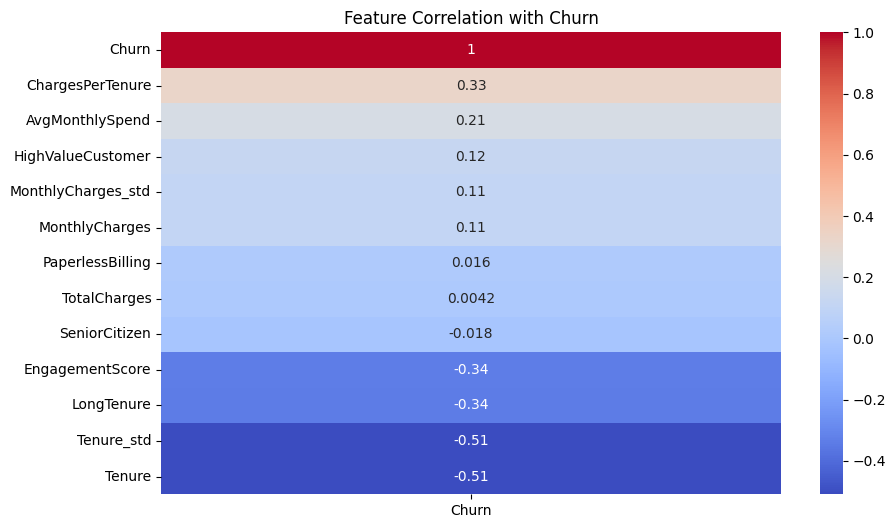

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(
    corr[['Churn']].sort_values(by='Churn', ascending=False),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation with Churn")
plt.show()


Note: Correlation was computed only after selecting numerical features
to avoid errors from categorical variables.


## Final Conclusion

In this project, customer churn data was preprocessed and transformed
using various data preprocessing and feature engineering techniques.

Categorical variables were encoded using Label Encoding and One-Hot Encoding.
Numerical features were scaled using Min-Max and Standard Scaling.
Outliers were handled using the IQR method.

New features such as Average Monthly Spend, High Value Customer,
Long Tenure, and Engagement Score were engineered to enhance model performance.

A complete preprocessing pipeline was built and tested successfully,
making the data ready for machine learning models.
